# Classification of Handwritten Digits

** Description about MNIST data **

MNIST data is a set of 70,000 small images of handwritten digits by students and employees. Each data point represents a set of labelled images represnting a digit. MNIST is the most studied dataset for a classification model.

** Getting the MNIST data set **

sklearn has modules to download wellknown datasets including MNIST data set

In [1]:
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

Dataset from sklearn usually has dictionary datastructure where'DESCR' key has Description as a value, 'COL_NAMES' has column names as a value, 'data'has array of features and data points as values and 'target' has labels.

In [3]:
X = mnist['data']
y = mnist['target']
y

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
y = y.reshape(70000,1)

In [7]:
y.shape

(70000, 1)

**Let us analyze the data by converting the data into data frames**


In [8]:
import pandas as pd
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

Analyzing input data: Input data has 784 features representing 28*28 pixel of each datapoint.
There are about 7000 such datapoints meaning 7000 images. Each feature has values from 0 to 255, 0 representing white & 255 representing black

In [9]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 52.3 MB


In [10]:
X_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


Analyzing labels: output labels has 7000 datapoints each having vales from 0 to 9 representing digits.

In [11]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
0    70000 non-null float64
dtypes: float64(1)
memory usage: 547.0 KB


In [12]:
y_df.describe()

,0
count,70000.000000
mean,4.452429
std,2.890195
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


** Getting data from yann lecunn dataset** 

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [13]:
import idx2numpy

**Extract Training data**

In [14]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [15]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
X_train.shape

(60000, 784)

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_train.shape

(60000,)

**Extract Test data**

In [19]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [20]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
X_test.shape

(10000, 784)

In [22]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [23]:
y_test.shape

(10000,)

**Function to display a digit image from one 1-d representation of pixels**

In [59]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
    image = image.reshape(28,28)
    sns.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    #plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Image Representation for %d" %(label))
    plt.show()

**Displaying a set of digits **

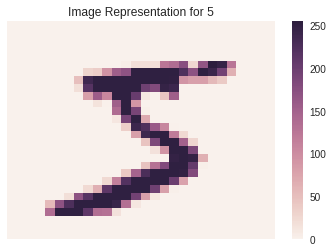

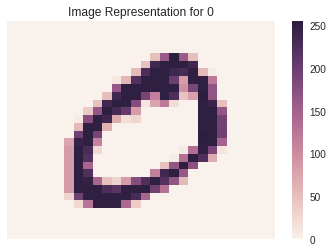

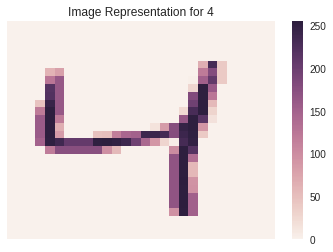

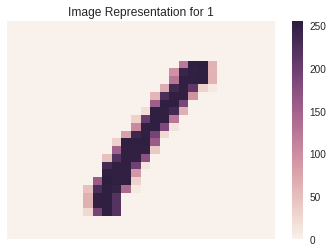

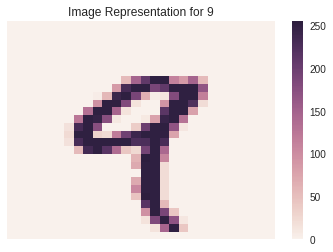

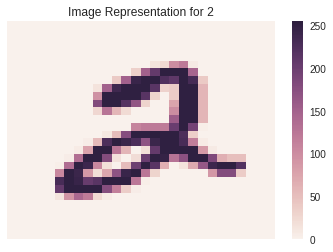

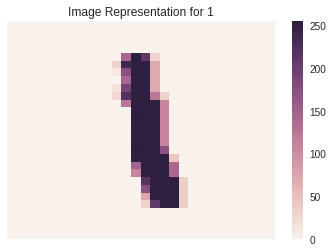

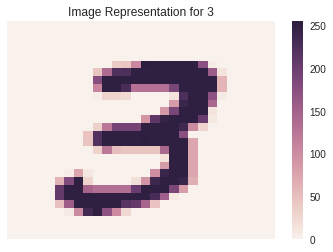

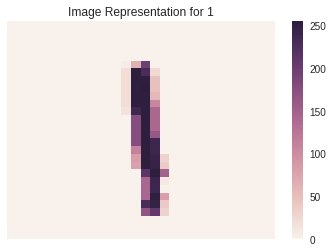

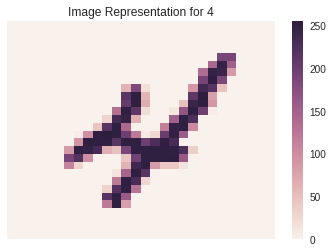

In [60]:
for i in range(10):
    display(X_train[i],y_train[i])

** Select a linear model(SVM) & evaluate the performance of the model using cross validation**

In [27]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_predict
svc_clf = LinearSVC(random_state=0,max_iter=5)

y_train_pred = cross_val_predict(svc_clf, X_train, y_train, cv=3)
svc_clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=5,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

**Calculate Cross Validation Score**

In [29]:
cross_val_score(svc_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.87172565,  0.85329266,  0.8720308 ])

y_train_pred is the predicted values in the train set such that the model has never seen the data before

In [30]:
y_train_pred

array([3, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [31]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Create a confusion matrix for cross validation prediction & actual labels**

In [32]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_train_pred)

In [33]:
confusionMatrix

array([[5478,    2,   98,   17,   18,   71,  125,   15,   77,   22],
       [   1, 6508,   56,   14,    3,   29,   28,   13,   78,   12],
       [  34,   77, 5189,  165,   80,   40,  102,  109,  140,   22],
       [  21,   45,  403, 4890,   10,  370,   55,   81,  142,  114],
       [  11,   26,   84,   20, 5092,   46,   97,   72,   59,  335],
       [  51,   29,   97,  290,   62, 4230,  157,   30,  308,  167],
       [  39,   12,   96,    8,   36,   81, 5591,   11,   34,   10],
       [  16,   26,   69,   23,   57,   18,    6, 5752,   17,  281],
       [  34,  164,  318,  308,   56,  406,   67,   70, 4268,  160],
       [  28,   27,   53,  116,  209,   67,    7,  433,   66, 4943]])

**Plot the Confusion matrix showing the diagonals.**

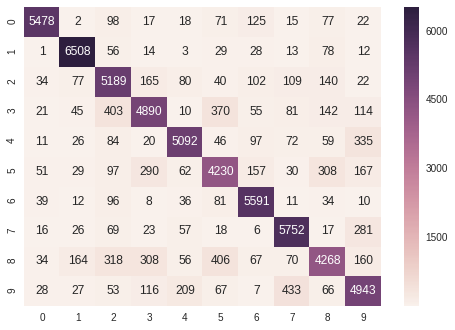

In [34]:
import seaborn as sns
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [35]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

In [36]:
import numpy as np
import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)

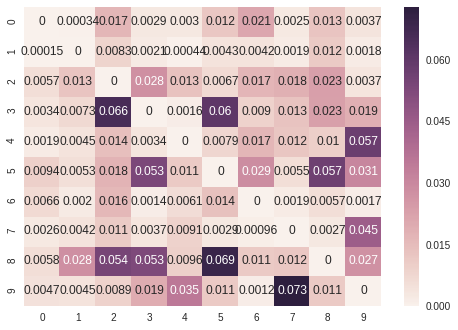

In [37]:
ax = sns.heatmap(norm_conf_mx,annot=True)

**Plot Confusion Matrix against Test data**

In [38]:
y_test_pred = svc_clf.predict(X_test)
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [39]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 872,    0,    5,   13,    1,   29,   32,    3,   24,    1],
       [   0, 1117,    3,    1,    0,    2,    5,    0,    7,    0],
       [   2,   12,  870,   45,   15,    8,   21,    5,   50,    4],
       [   1,    0,   13,  925,    1,   31,    5,    4,   19,   11],
       [   0,    0,    4,   13,  823,    6,   21,    2,   55,   58],
       [   3,    2,    2,   69,    8,  741,   21,    2,   38,    6],
       [   5,    3,    4,    2,    7,   21,  907,    1,    8,    0],
       [   0,   11,   31,   23,    7,   14,    1,  866,   16,   59],
       [   2,   16,    6,   79,    6,   66,   20,    6,  763,   10],
       [   6,    5,    4,   31,   31,   22,    1,   16,   41,  852]])

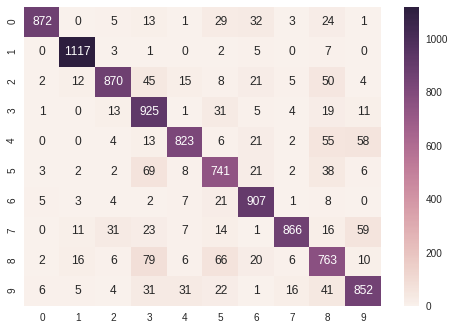

In [40]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [41]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

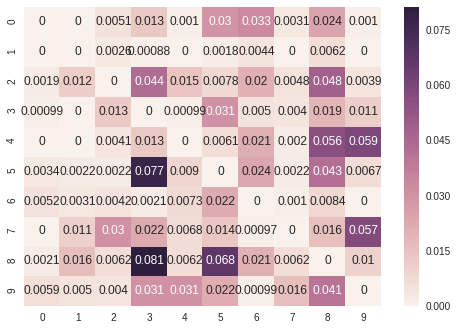

In [42]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.87360000000000004

**Evaluating the performance on scaled data**

In [44]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
svc_clf = LinearSVC(random_state=0)
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [45]:
y_train_pred_scaled = cross_val_predict(svc_clf, X_train_scaled, y_train, cv=3)
y_train_pred_scaled

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Calculate Cross-Validation Score **

In [46]:
cross_val_score(svc_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.89857029,  0.900045  ,  0.90278542])

In [47]:
confusionMatrix = confusion_matrix(y_train, y_train_pred_scaled)
confusionMatrix

array([[5678,    1,   47,   14,   13,   46,   56,   11,   52,    5],
       [   2, 6534,   47,   22,   14,   32,    8,   14,   58,   11],
       [  61,   84, 5211,  105,   78,   34,   96,  105,  158,   26],
       [  33,   38,  192, 5291,   21,  216,   35,   79,  149,   77],
       [  20,   33,   42,   23, 5347,   33,   49,   25,   54,  216],
       [  65,   40,   48,  194,   76, 4632,   99,   26,  177,   64],
       [  54,   23,   76,    8,   54,   90, 5550,    8,   48,    7],
       [  23,   39,   60,   28,   82,   21,    7, 5779,   30,  196],
       [  53,  156,  104,  161,   50,  216,   64,   32, 4905,  110],
       [  40,   38,   34,  132,  198,   66,    3,  273,   64, 5101]])

**Plot the Confusion matrix showing the diagonals.**

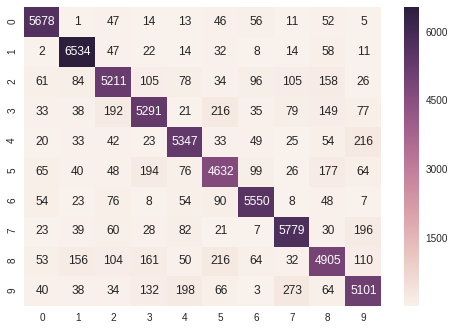

In [48]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [49]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

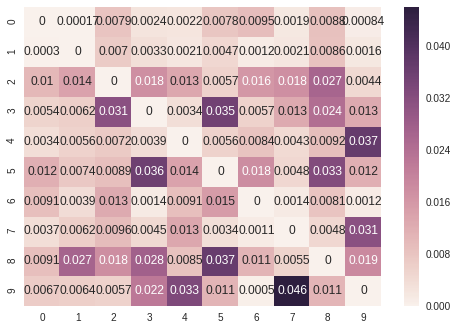

In [50]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [51]:
svc_clf.fit(X_train_scaled,y_train)
y_test_pred=svc_clf.predict(X_test)

In [52]:
y_test_pred

array([7, 6, 1, ..., 4, 8, 6], dtype=uint8)

**Plot Confusion Matrix against Test data**

In [53]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[949,   0,   1,   2,   1,   0,   7,   0,  13,   7],
       [  0, 897,   2,   3,   0,   0,   3,   1, 226,   3],
       [  6,   6, 731,  33,   8,   0,  21,   1, 184,  42],
       [  7,   1,   5, 894,   1,   0,   6,   1,  69,  26],
       [  2,   0,   0,   1, 747,   0,  11,   0,  49, 172],
       [ 27,   1,   0, 118,  12, 102,  30,   2, 509,  91],
       [ 12,   1,   2,   2,   8,   0, 901,   0,  30,   2],
       [ 10,   3,  10,  16,  14,   0,   1, 697,  61, 216],
       [  5,   1,   0,   9,   5,   0,   9,   0, 924,  21],
       [  3,   2,   0,   6,   5,   0,   1,   0,  38, 954]])

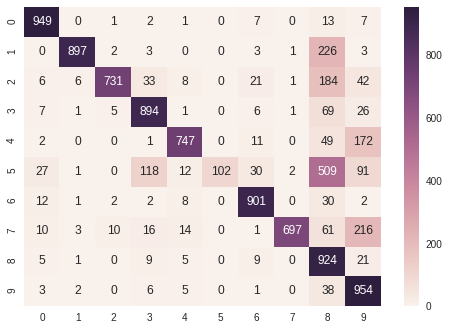

In [54]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [55]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

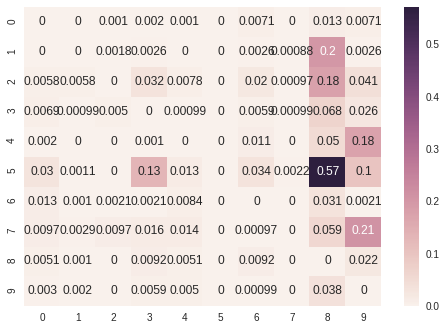

In [56]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [57]:
accuracy_score(y_test, y_test_pred)

0.77959999999999996

In [58]:
print("finished")

finished
